# <font color=blue>Assignments for "Data Exploration - Multivariate Analysis"</font>

In this assignment, you will continue to study the data of the `Students Performance in Exams` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sqlalchemy import create_engine
import warnings

students = pd.read_csv("../../data/EDA/StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**(1)** Does the performance in the exams vary according to gender, origin and education level of parents?

In [13]:
students.gender.unique()

array(['female', 'male'], dtype=object)

In [14]:
variables=["math score", "reading score", "writing score"]

In [15]:
gender=students.groupby("gender").mean()[variables].T
p_value=[]
for var in variables:
    ttest = stats.ttest_ind(students[students.gender == students.gender.unique()[0]][var],
                             students[students.gender == students.gender.unique()[1]][var])
    p_value.append(ttest.pvalue)
    
gender['p_value']=p_value 
gender 

gender,female,male,p_value
math score,63.633205,68.728216,9.120186e-08
reading score,72.608108,65.473029,4.680539e-15
writing score,72.467181,63.311203,2.019878e-22


In [16]:
race=students.groupby("race/ethnicity").mean()[variables].T
p_value=[]
for var in variables:
    Y=students[var]
    X=students["race/ethnicity"]
   
    model = ols('Y ~ X', data=students).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value.append(anova_table['PR(>F)'][0])
    
race['p_value']=p_value 
race 

race/ethnicity,group A,group B,group C,group D,group E,p_value
math score,61.629213,63.452632,64.463950,67.362595,73.821429,1.373219e-11
reading score,64.674157,67.352632,69.103448,70.030534,73.028571,1.780089e-04
writing score,62.674157,65.600000,67.827586,70.145038,71.407143,1.097919e-05


In [17]:
education=students.groupby("parental level of education").mean()[variables].T
p_value=[]
for var in variables:
    Y=students[var]
    X=students["parental level of education"]
   
    model = ols('Y ~ X', data=students).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value.append(anova_table['PR(>F)'][0])
    
education['p_value']=p_value 
education

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,p_value
math score,67.882883,69.389831,62.137755,69.745763,67.128319,63.497207,5.592272e-06
reading score,70.927928,73.000000,64.704082,75.372881,69.460177,66.938547,1.168246e-08
writing score,69.896396,73.381356,62.448980,75.677966,68.840708,64.888268,1.120280e-13


**(2)** Does lunch type have a relationship with exam performances? How can you explain this, if any?

In [18]:
students.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [19]:
lunch=students.groupby("lunch").mean()[variables].T
p_value=[]
for var in variables:
    ttest = stats.ttest_ind(students[students.lunch == students.lunch.unique()[0]][var],
                             students[students.lunch == students.lunch.unique()[1]][var])
    p_value.append(ttest.pvalue)
    
lunch['p_value']=p_value 
lunch

lunch,free/reduced,standard,p_value
math score,58.921127,70.034109,2.413196e-30
reading score,64.653521,71.654264,2.002797e-13
writing score,63.022535,70.823256,3.186190e-15


**(3)** Does the preparation courses have an impact on exam performance?

In [20]:
students["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [21]:
test=students.groupby("test preparation course").mean()[variables].T
p_value=[]
for var in variables:
    ttest = stats.ttest_ind(students[students["test preparation course"] == students["test preparation course"].unique()[0]][var],
                             students[students["test preparation course"] == students["test preparation course"].unique()[1]][var])
    p_value.append(ttest.pvalue)
    
test['p_value']=p_value 
test

test preparation course,completed,none,p_value
math score,69.695531,64.077882,1.535913e-08
reading score,73.893855,66.534268,9.081783e-15
writing score,74.418994,64.504673,3.685292e-24


**(4)** Which lessons are most correlated with each other?

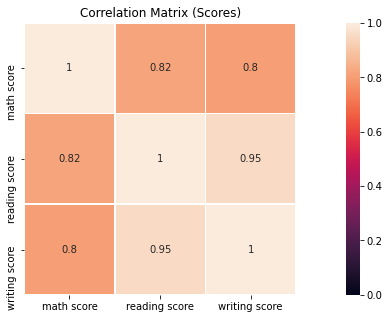

In [22]:
plt.figure(figsize=(18,5))

corr_lessons = students[variables].corr()
sns.heatmap(corr_lessons,  square=True, annot=True, linewidths=.5, vmin=0, vmax=1)
plt.title("Correlation Matrix (Scores)")
plt.show()